In [2]:
import pandas as pd
import numpy as np
#Note: This estimator is still experimental for now: default parameters or details of behaviour might change 
#without any deprecation cycle.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns


#Filepath
white = '/home/dl4/dst/Winequality_White.xlsx'
red = '/home/dl4/dst/Winequality_Red.xlsx'
full_colored = '/home/dl4/dst/Winequality_full.xlsx'


#Data with color
df_listC = pd.read_excel(full_colored)


df_listCnoNA = df_listC.dropna()
#Clean quality from 99 and 17 values
df_temp= df_listCnoNA[df_listCnoNA['quality']!=99]
df_listCnoNAClean =df_temp[df_temp['quality']!=17]
df_listCnoNAClean =df_listCnoNAClean[df_listCnoNAClean['pH']!=99.99]

#Auftrennung in Datensatz Rotwein und Datensatz Weißwein
df_red = df_listCnoNAClean.loc[df_listCnoNAClean["color"] == "red"]
df_white = df_listCnoNAClean.loc[df_listCnoNAClean["color"] == "white"]

print(df_listC.iloc[:,10])
print(df_red.iloc[:,10])
print(df_white.iloc[:,10])
#Label und ID Säule entfernen
df_red = df_red.drop(["color", "ID"], axis=1)
df_white = df_white.drop(["color", "ID"], axis=1).reset_index(drop=True)

#Faulty Data
df_redWNA = pd.read_excel(red)
df_whiteWNA = pd.read_excel(white)



wine_list = [df_white, df_red]

df_listC
df_white

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
6490    3.27
6491    3.15
6492    2.99
6493    3.34
6494    3.26
Name: pH, Length: 6495, dtype: float64
0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1592    3.42
1594    3.52
1595    3.42
1596    3.57
1597    3.39
Name: pH, Length: 1564, dtype: float64
1598    3.00
1599    3.30
1600    3.26
1601    3.19
1602    3.19
        ... 
6490    3.27
6491    3.15
6492    2.99
6493    3.34
6494    3.26
Name: pH, Length: 4881, dtype: float64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,magnesium,alcohol,lightness,quality
0,7.0,0.27,0.36,20.7,0.045,0.38,45.0,170.0,1.00100,3.00,0.46,0.45,8.8,0.13,6
1,6.3,0.30,0.34,1.6,0.049,0.38,14.0,132.0,0.99400,3.30,0.56,0.49,9.5,0.11,6
2,8.1,0.28,0.40,6.9,0.050,0.38,30.0,97.0,0.99510,3.26,0.56,0.44,10.1,0.11,6
3,7.2,0.23,0.32,8.5,0.058,0.38,47.0,186.0,0.99560,3.19,0.53,0.40,9.9,0.12,6
4,7.2,0.23,0.32,8.5,0.058,0.38,47.0,186.0,0.99560,3.19,0.52,0.40,9.9,0.10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,6.2,0.21,0.29,1.6,0.039,0.38,24.0,92.0,0.99114,3.27,0.26,0.50,11.2,0.10,6
4877,6.6,0.32,0.36,8.0,0.047,0.38,57.0,168.0,0.99490,3.15,0.85,0.46,9.6,0.12,5
4878,6.5,0.24,0.19,1.2,0.041,0.38,30.0,111.0,0.99254,2.99,0.91,0.46,9.4,0.12,6
4879,5.5,0.29,0.30,1.1,0.022,0.38,20.0,110.0,0.98869,3.34,0.24,0.38,12.8,0.08,7


In [104]:
df2 = df_white[df_white.isna().any(axis=1)]
#print(df2)
print(df_whiteWNA[df_whiteWNA.isna().any(axis=1)])

df3 = df_listC[df_listC.isna().any(axis=1)]
df3

      ID  fixed acidity  volatile acidity  citric acid  residual sugar  \
75    76            7.4              0.24         0.29            10.1   
76    77            7.1              0.18         0.36             1.4   
77    78            7.0              0.32         0.34             1.3   
152  153            6.9              0.25         0.30             4.1   
263  264            7.2              0.29         0.40            13.6   
264  265            6.2              0.24         0.35             1.2   
330  331            6.4              0.32         0.35             4.8   
331  332            6.8              0.24         0.34             4.6   
439  440            6.2              0.35         0.04             1.2   
520  521            7.9              0.19         0.26             2.1   
604  605            6.3              0.26         0.49             1.5   
645  646            6.3              0.26         0.25             1.1   

     chlorides  flavanoids  free sulf

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,magnesium,alcohol,lightness,quality,color
11,12,7.5,0.50,0.36,6.1,0.070,0.53,17.0,102.0,1.0000,NaN,0.80,0.42,10.50,0.101,5,red
22,23,NaN,0.43,0.21,1.6,0.110,0.53,10.0,37.0,1.0000,3.17,0.91,0.59,9.50,0.112,5,red
61,62,NaN,0.69,0.49,1.8,0.120,0.53,20.0,112.0,1.0000,3.21,0.71,0.22,9.30,0.113,5,red
97,98,NaN,0.50,0.25,2.0,0.070,0.53,3.0,22.0,1.0000,3.25,0.63,0.26,9.20,0.113,5,red
187,188,NaN,0.71,0.10,2.6,0.080,0.53,9.0,26.0,1.0000,3.39,0.49,0.00,9.70,0.105,5,red
274,275,NaN,0.65,0.18,7.0,0.090,0.53,27.0,94.0,1.0000,3.38,0.77,0.96,9.40,0.109,5,red
409,410,NaN,0.46,0.49,4.5,0.070,0.53,26.0,49.0,1.0000,3.05,0.57,0.14,9.60,0.112,4,red
410,411,NaN,0.43,0.34,2.5,0.080,0.53,26.0,86.0,1.0000,3.38,0.62,0.62,9.50,0.110,6,red
411,412,NaN,0.45,0.35,2.4,0.080,0.53,23.0,78.0,1.0000,3.38,0.62,0.58,9.50,0.107,5,red
412,413,NaN,0.74,0.16,1.9,0.100,0.53,15.0,77.0,1.0000,3.27,0.64,0.69,9.30,0.108,5,red


In [105]:
# Missing Values


###########################################################
#-------------White Wine-----------------------------------#
###########################################################
print("White wine:------------------------------------------------------\n")
#print("pH Values (white): \n",transformed_x2[:,10].mean())
#print(df_white['pH'])
print("Mean pH before MV (white): ",df_whiteWNA['pH'].mean())


# numpy_white= df_white.to_numpy()
# numpy_red= df_red.to_numpy()

print("Missing value here (ID=76): ", df_whiteWNA.iloc[76,10],"\n")


#Multivariate / Regression Imputation
imp = IterativeImputer(max_iter=10)
transformed_x= np.round(imp.fit_transform(df_whiteWNA))
print("Mean white wine (Multivariate/Regression Imputation): ",transformed_x[:,10].mean(axis=0)) #only 8 column (pH)
print("Previous missing value now calculated (ID=76): ", transformed_x[76,10],"\n")
#print(pd.DataFrame(transformed_x[70:80,10]))

#Stochastic Regression Imputation: sample_posterior=True
random_seed=0
imp2 = IterativeImputer(max_iter=10, random_state=random_seed,sample_posterior=True)
transformed_x2= np.round(imp2.fit_transform(df_whiteWNA),1)
print("Stochastic Regression Imputation of x (round 1): ",transformed_x2[:,10].mean(),"\n")
print("Previous missing value now calculated (ID=76): ", transformed_x2[76,10],"\n")
#print(pd.DataFrame(transformed_x2[70:80,10]))
#Stochastic Regression Imputation: sample_posterior=True
#Best result for white wine
random_seed=2
imp3 = IterativeImputer(max_iter=10, random_state=random_seed,sample_posterior=True)
transformed_x3= np.round(imp3.fit_transform(df_whiteWNA),1)
print("Stochastic Regression Imputation of x (round 2): ",transformed_x3[:,10].mean(),"\n")
print("Previous missing value now calculated (ID=76): ", transformed_x3[76,10],"\n")
#print(pd.DataFrame(transformed_x3[70:80,10]))

df_whiteNNA = df_whiteWNA.dropna()
print("Mean value without NA: ", df_whiteNNA['pH'].mean())
###########################################################
#--------------Red Wine-----------------------------------#
###########################################################
#Multivariate / Regression Imputation
print("Red wine:------------------------------------------------------\n")
print("Mean pH before MV (white): ",df_redWNA['pH'].mean())
# [11]-> 11th index of row/zeile & feature/attribute on the 10th index = "pH"
print("Missing value here (ID=12): ", df_redWNA.iloc[11][10],"\n")

#print(df_redWNA.iloc[:,9].mean(), "<- 9")
#print(df_redWNA.iloc[:,10].mean(), "<- 10")
#print(df_redWNA.iloc[11][10])

#Multivariate / Regression Imputation
imp_r1 = IterativeImputer(max_iter=10)
transformed_xR= np.round(imp_r1.fit_transform(df_redWNA))
print("Mean white wine (Multivariate/Regression Imputation): ",transformed_xR[:,10].mean(),"\n")
print("Previous missing value now calculated (ID=11): ", transformed_xR[11,10],"\n")
#print(pd.DataFrame(transformed_xR[0:10,10]))

#Stochastic Regression Imputation: sample_posterior=True
random_seed=0
imp_r2 = IterativeImputer(max_iter=10, random_state=random_seed,sample_posterior=True)
transformed_xR2= np.round(imp_r2.fit_transform(df_redWNA),1)
print("Stochastic Regression Imputation of x (round 1): ",transformed_xR2[:,10].mean(),"\n")
#print(pd.DataFrame(transformed_xR2[0:10,10]))
print("Previous missing value now calculated (ID=11): ", transformed_xR2[11,10],"\n")
#Stochastic Regression Imputation: sample_posterior=True
#Best result for white wine
random_seed=2
imp_r3 = IterativeImputer(max_iter=10, random_state=random_seed,sample_posterior=True)
transformed_xR3= np.round(imp_r3.fit_transform(df_redWNA),1)
print("Stochastic Regression Imputation of x (round 2): ",transformed_xR3[:,10].mean(),"\n")
print("Previous missing value now calculated (ID=11): ", transformed_xR3[11,10],"\n")
#print(pd.DataFrame(transformed_xR3[0:10,10]))

df_redNNA = df_redWNA.dropna()
print("Mean value without NA: ", df_redNNA['pH'].mean())

White wine:------------------------------------------------------

Mean pH before MV (white):  3.188329580348004
Missing value here (ID=76):  nan 

Mean white wine (Multivariate/Regression Imputation):  3.0318562385133756
Previous missing value now calculated (ID=76):  3.0 

     0
0  3.0
1  3.0
2  4.0
3  3.0
4  3.0
5  3.0
6  3.0
7  3.0
8  3.0
9  3.0
Stochastic Regression Imputation of x (round 1):  3.195303246885848 

Previous missing value now calculated (ID=76):  13.9 

      0
0   3.1
1   3.3
2   3.7
3   3.0
4   3.3
5  -1.7
6  13.9
7   2.4
8   2.9
9   3.3
Stochastic Regression Imputation of x (round 2):  3.1898509291402903 

Previous missing value now calculated (ID=76):  0.7 

     0
0  3.1
1  3.3
2  3.7
3  3.0
4  3.3
5  4.6
6  0.7
7 -0.7
8  2.9
9  3.3
Mean value without NA:  3.188329580348004
Red wine:------------------------------------------------------

Mean pH before MV (white):  3.4516487681617183
Missing value here (ID=12):  nan 

0.9985106382978722 <- 9
3.4516487681617183 

In [113]:
# Outliers
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#tuples = [tuple(x) for x in df_red1.values]
#X, y = tuples
#print(tuples)

#X, y = load_wine(return_X_y=True)
#X = df_red1.values
#print(X)
#y = df_red1.index
#print(y)

#wine = load_wine()
#print(wine.data[0]) #X
#print(wine.target) #y
#print(wine.feature_names)
#print(wine.target_names)

#Important (old)
#y = df_red1.iloc[:,15].to_numpy() #Only qualiy
#X = df_red1.iloc[:,1:15].to_numpy() #all column except quality


y = df_listCnoNAClean.iloc[:,15].to_numpy() #Only qualiy
X = df_listCnoNAClean.iloc[:,1:15].to_numpy() #all column except quality


#print(X)
#print(y)


print("--------------SVC Classifier--------------")
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# summarize the shape of the training dataset
print("Shape of dataset: ",X_train.shape, y_train.shape) #x -> 14 features; y -> 1 feature (quality)

## fit the model
model = SVC()
model.fit(X_train, y_train)

## evaluate the model
y_pred = model.predict(X_test)

## evaluate predictions
accuracy = model.score(X_test,y_test)
print('Accuracy: %.3f' % accuracy)


print("--------------Outliers: Isolation Forests--------------")
#Outlier Detection based on Isolation Forests
from sklearn.ensemble import IsolationForest

# identify outliers in the wine training dataset based on IsolationForest class and an assumed contamination of 0.1
iso = IsolationForest(contamination=0.1)
y_out = iso.fit_predict(X_train)
# build a mask to select all rows that are not outliers (inlier=1, outlier=-1)
mask = y_out != -1
X_train_red, y_train_red = X_train[mask, :], y_train[mask]
# Inliers vs. Outliers
print("Inliers: ",X_train_red.shape[0],"Outliers",X_train.shape[0]-X_train_red.shape[0])
# fit the model
model = SVC()
model.fit(X_train_red, y_train_red)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = model.score(X_test,y_test)
print('Accuracy: %.3f' % accuracy)



print("--------------Outliers: Minimum Covariance Determinant / Elliptic Envelope-------")
#Outlier Detection based on Minimum Covariance Determinant / Elliptic Envelope
from sklearn.covariance import EllipticEnvelope

def identify_inliers(classifier, X_training, y_training):
    y_out = classifier.fit_predict(X_training)
    # build a mask to select all rows that are not outliers (inlier=1, outlier=-1)
    mask = y_out != -1
    outliers = y_out != 1
    X_train_red, y_train_red = X_training[mask, :], y_training[mask]
    # Inliers vs. Outliers
    print("Inliers: ",X_train_red.shape[0],"Outliers",X_train.shape[0]-X_train_red.shape[0])
    print("These are outliners: ",X_training[outliers, :].shape,y_training[outliers].shape) #these are outliners
    print(mask)
    #g = sns.FacetGrid(X_training, col="sex", hue=y_train_red)
    #g.map(plt.scatter, "total_bill", "tip", alpha=.7)
    #g.add_legend();
    print("---------before Outlier cleanup---------")
    print("Mean Value: ", X_training[:,7].mean())
    #fig, ax = plt.subplots(figsize=(16,8))
    
    #ax.scatter(X_training[:,7], y_training[:]) #[:,7] -> free sulfur dioxide
    #ax.scatter(X_training[:,9], y_training[:]) #[:,9] -> PH Wert
    ##ax.scatter(X_train_red[:,9], y_train_red[:]) #[:,9] -> PH Wert
    
    #ax.set_xlabel('pH-Value')#pH wert
    #ax.set_ylabel('y-Value')
    #plt.show()
    print("---------after Outlier cleanup---------")
    print("Mean Value: ", X_train_red[:,7].mean())
    
    #fig, ax = plt.subplots(figsize=(16,8))
    
    ##ax.scatter(X_train_red[:,7], y_train_red[:]) #[:,7] -> Pfree sulfur dioxide
    ##ax.scatter(X_training[:,9], y_training[:]) #[:,9] -> PH Wert
    #ax.scatter(X_train_red[:,9], y_train_red[:]) #[:,9] -> PH Wert
    #ax.set_xlabel('pH-Value (y-Value)')#pH wert
    #ax.set_ylabel('quality (y-Value)')#quality
    #plt.show()
    
    #print(X_train_red)
    return X_train_red, y_train_red

def fit_and_evaluate_model(X_inl, y_inl, X_tes, y_tes):
    # fit the model
    model = SVC()
    model.fit(X_inl, y_inl)
    # evaluate the model
    y_pred = model.predict(X_tes)
    # evaluate predictions
    accuracy = model.score(X_tes,y_tes)
    print('Accuracy: %.3f' % accuracy)
    
ee = EllipticEnvelope(contamination=0.1)
X_inlier, y_inlier= identify_inliers(ee , X_train, y_train)
fit_and_evaluate_model(X_inlier, y_inlier, X_test, y_test)


print("--------------Outliers: Local Outlier Factor---------")
#Outlier Detection based on Local Outlier Factor
# evaluate model performance with outliers removed using local outlier factor
from sklearn.neighbors import LocalOutlierFactor

#Create an outlier detection classifier based on the LocalOutlierFactor class
lof = LocalOutlierFactor()

#Call identify_inliers with this classifier and the training data
X_inlier, y_inlier= identify_inliers(lof , X_train, y_train)

#Call fit_and_evaluate_model with the returned inliers and the test data
fit_and_evaluate_model(X_inlier, y_inlier, X_test, y_test)


print("--------------Outliers: One-Class SVM---------")
#Outlier Detection based on One-Class SVM
# evaluate model performance with outliers removed using one class SVM
from sklearn.svm import OneClassSVM

#Create an outlier detection classifier based on the OneClassSVM class, contamination=0.01
ee = OneClassSVM(nu=0.01)

#Call identify_inliers with this classifier and the training data
X_inlier, y_inlier= identify_inliers(ee , X_train, y_train)

#Call fit_and_evaluate_model with the returned inliers and the test data
fit_and_evaluate_model(X_inlier, y_inlier, X_test, y_test)

--------------SVC Classifier--------------
Shape of dataset:  (4511, 14) (4511,)
Accuracy: 0.433
--------------Outliers: Isolation Forests--------------
Inliers:  4060 Outliers 451
Accuracy: 0.432
--------------Outliers: Minimum Covariance Determinant / Elliptic Envelope-------
Inliers:  4060 Outliers 451
These are outliners:  (451, 14) (451,)
[ True  True  True ...  True False  True]
---------before Outlier cleanup---------
Mean Value:  115.85723786300156
---------after Outlier cleanup---------
Mean Value:  124.07586206896552
Accuracy: 0.432
--------------Outliers: Local Outlier Factor---------
Inliers:  4438 Outliers 73
These are outliners:  (73, 14) (73,)
[ True  True  True ...  True  True  True]
---------before Outlier cleanup---------
Mean Value:  115.85723786300156
---------after Outlier cleanup---------
Mean Value:  115.41189725101397
Accuracy: 0.435
--------------Outliers: One-Class SVM---------
Inliers:  4464 Outliers 47
These are outliners:  (47, 14) (47,)
[ True  True  True 

In [4]:
# Noise
#Now we will put both approaches together: cross-fold prediction and ensemble learning based 
#on the Iris data set prepared earlier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

#load iris data
y = df_listCnoNAClean.iloc[:,15].to_numpy() #Only qualiy
X = df_listCnoNAClean.iloc[:,1:15].to_numpy() #all column except quality
print(x.shape)
x_y= np.concatenate((X.reshape(150,4),y.reshape(150,1)),1)

#Perform cross-fold prediction with k=3
clf1 = svm.SVC(kernel='linear', C=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('svm', clf1), ('knn', clf2), ('gnb', clf3)], voting='hard')
#eclf1 = eclf1.fit(x,y)

#Perform non-cross-fold prediction 
#y_pred= eclf1.predict(x)
#Perform cross-fold prediction with k=3
y_pred = cross_val_predict(eclf, X, y, cv=3)

#Re-format result into data frame to increase readability
#Create column list
df_columns=['SL','SW','PL','PW']
df_columns.append('Label')
#Create PANDAS data frame
df = pd.DataFrame(x_y,columns=df_columns)
#Add prediction results column
df['Prediction']=y_pred
#Add prediction correctness column
df['Correct Prediction']=df['Prediction'] == df['Label']

print("\nEntire Iris Data Set including prediction:")
print(df)

print("Only wrong predictions / Potential label noise:\n",df[df['Correct Prediction'] == False])

#Plot the potential noise
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['red','blue']
markers= ('s','o','v')
pred_num=df['Prediction']

plt.scatter(df[pred_num==0]['SL'], df[pred_num==0]['SW'],marker='s',c='blue')
plt.scatter(df[pred_num==1]['SL'], df[pred_num==1]['SW'],marker='o',c=df[pred_num==1]['Correct Prediction'],cmap=ListedColormap(colors))
plt.scatter(df[pred_num==2]['SL'], df[pred_num==2]['SW'],marker='v',c=df[pred_num==2]['Correct Prediction'],cmap=ListedColormap(colors))

plt.show()

NameError: name 'x' is not defined

In [ ]:
# Data Exploring (Mean, Min/max,etc.)
import numpy as np
import matplotlib.pyplot as plt

print("Mean values: \n", df_listC.mean())
print("\n")
print("Missing values: \n",df_listC.isnull().sum())

#for i in range(0,17):
#    print(df_red[i].mean())
print("\n")
print("Detail for every column (ignoring missing values)")
for i in range(0,16):
    print("-----------------------------------------------------------")
    print("Column name: ",df_listCnoNA.columns.values[i])
    print("Values: ",df_listCnoNA.iloc[:,i].describe(), "\n")
    #print("Min value: ",df_red1.iloc[:,i].min())
    #print("Max value: ",df_red1.iloc[:,i].max())
    #print("Mean value: ",df_red1.iloc[:,i].mean())
    #print("Missing values: ", details.isnull().sum())
    plt.boxplot(df_listCnoNA.iloc[:,i]) #Boxplot wiht default Values
    plt.xlabel(df_listCnoNA.columns.values[i])
    plt.show()
    ax1= sns.distplot(df_listCnoNA.iloc[:,i]).set_title("Seaborn Histogram")#kde=true (default Wert) zeigt geglaettete Linie
    plt.show()
    sns.scatterplot(y=df_listCnoNAClean['quality'], x=df_listC.iloc[:,i], hue = df_listC['color'])
    plt.show()

Weißwein Skew:
fixed acidity           0.647363
volatile acidity        1.574424
citric acid             1.284795
residual sugar          1.075824
chlorides               5.025558
flavanoids              0.000000
free sulfur dioxide     1.406552
total sulfur dioxide    0.387699
density                 0.976748
pH                      0.458768
sulphates              -0.025326
magnesium               0.980032
alcohol                 0.486121
lightness              -0.117372
quality                 0.155848
dtype: float64

Weißwein Kurtosis:
fixed acidity            2.167770
volatile acidity         5.075559
citric acid              6.170920
residual sugar           3.473933
chlorides               37.558571
flavanoids               0.000000
free sulfur dioxide     11.481252
total sulfur dioxide     0.573850
density                  9.798207
pH                       0.533035
sulphates               -1.177286
magnesium                1.611151
alcohol                 -0.699119
lightness    

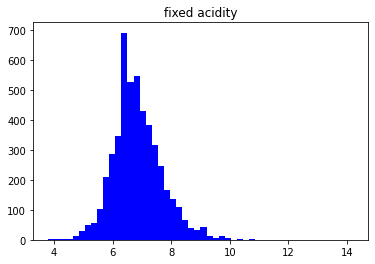

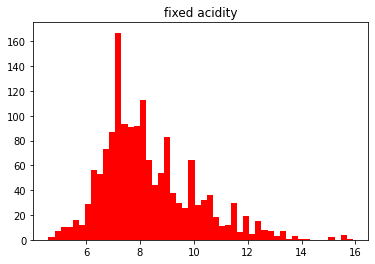

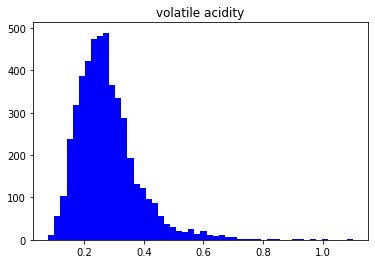

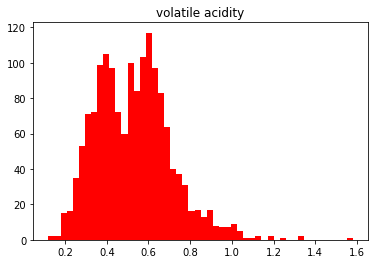

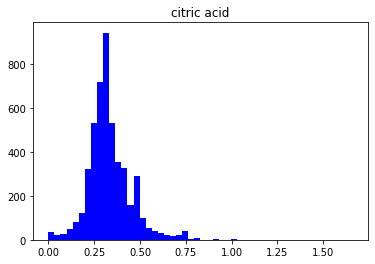

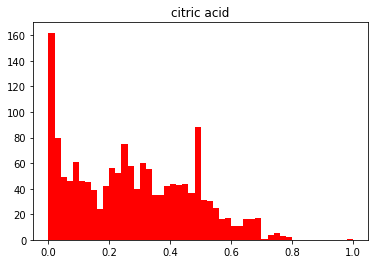

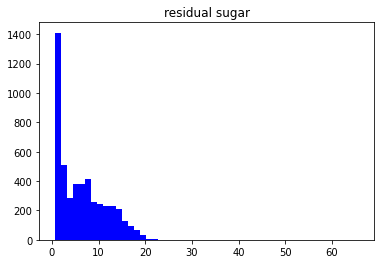

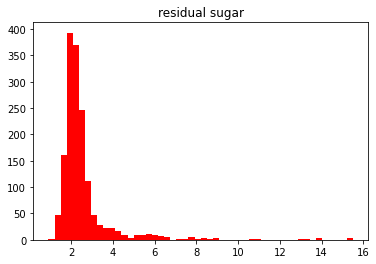

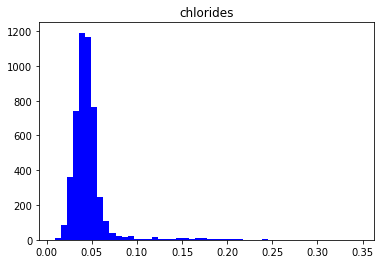

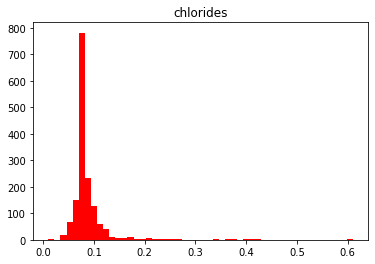

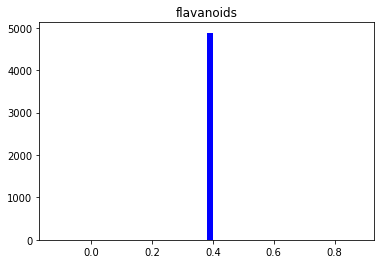

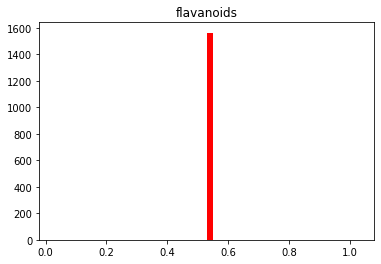

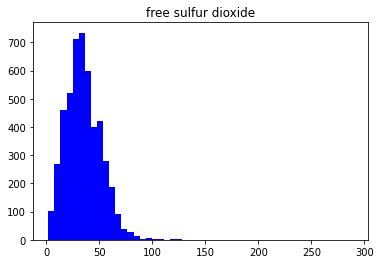

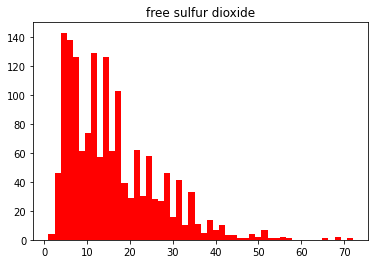

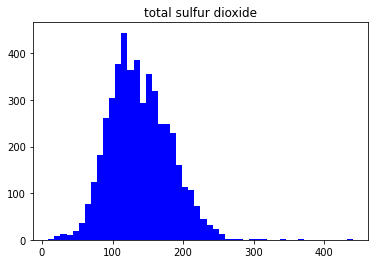

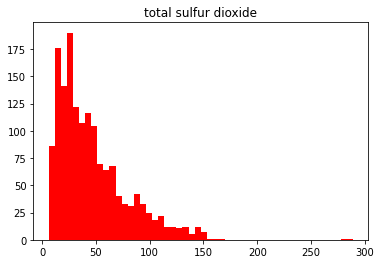

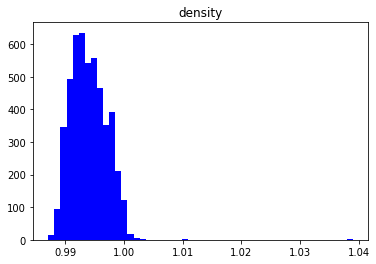

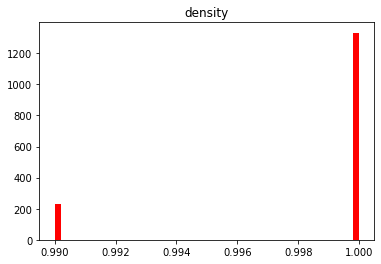

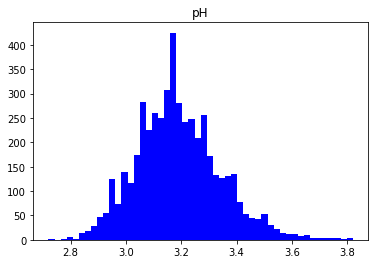

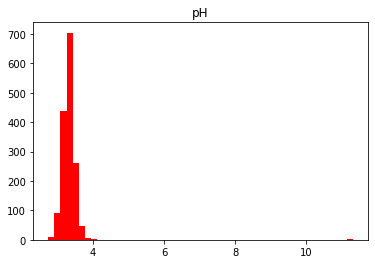

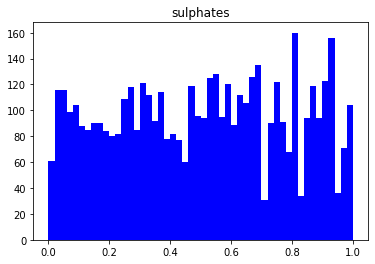

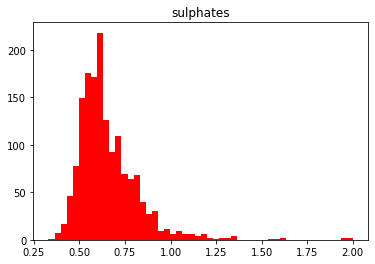

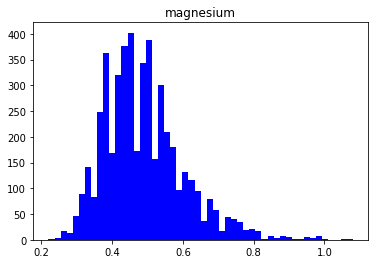

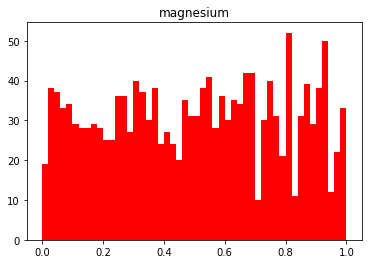

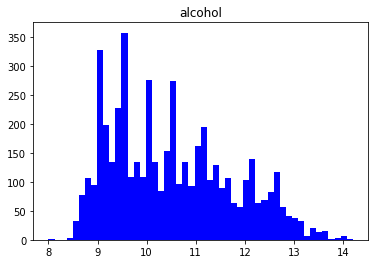

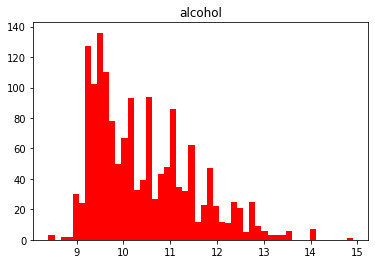

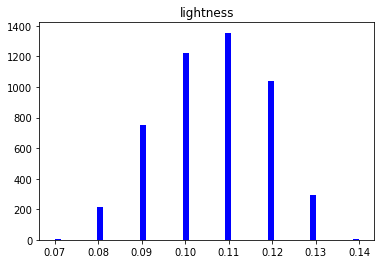

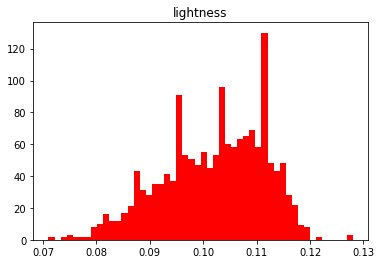

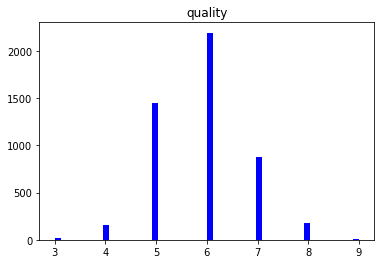

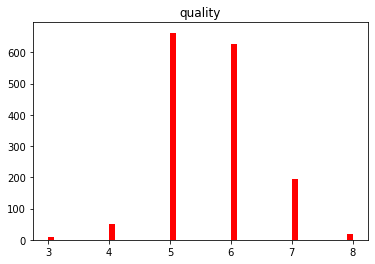

In [12]:
# log test

num_bins = 50

print("Weißwein Skew:")
print(df_white.skew(axis=0))
print()
print("Weißwein Kurtosis:")
print(df_white.kurtosis(axis=0))
print()
print()
print("Rotwein Skew:")
print(df_red.skew(axis=0))
print()
print("Rotwein Kurtosis:")
print(df_red.kurtosis(axis=0))
for col in df_white:
    try: 
        #Plotte Weißwein
        plt.hist(df_white[col], num_bins, facecolor = "b")
        plt.title(col)
        plt.show()
        
#         ln = np.log(df_white[col])
#         plt.hist(ln, num_bins, facecolor = "b")
#         plt.title(col)
#         plt.show()
        
        #Plotte Rotwein
        plt.hist(df_red[col], num_bins, facecolor = "r")
        plt.title(col)
        plt.show()

#         ln = np.log(df_red[col])
#         plt.hist(ln, num_bins, facecolor = "r")
#         plt.title(col)
#         plt.show()
    except Exception as e:
        print(e)


In [ ]:

# Scale

# Datenset wird mit PowerTransformer transformiert und normalisiert
cols = df_filter.columns
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
trans = pt.fit_transform(df_red1)
df_trans = pd.DataFrame(trans, columns = cols)
df_trans
for col in df_trans:  
    if col == "ID":
        pass
    else:
        plt.hist(df_trans[col], num_bins)
        plt.title(col)
        plt.show()

In [ ]:
# Feature Selection

#Korrelation-Matrix daten normalisiert

correlation = df_trans.corr()
correlation = correlation.round(2)

fig, ax = plt.subplots(figsize = [12, 12])
sns.heatmap(ax = ax, data=correlation, annot = True)
plt.show()

#Korrelation-Matrix daten nicht-normalisiert
for df in df_list1:
    correlation = df.corr()
    correlation = correlation.round(2)

    fig, ax = plt.subplots(figsize = [12, 12])
    sns.heatmap(ax = ax, data=correlation, annot = True)
    plt.show()

In [ ]:
# Feature Selection

#Korrelation-Matrix daten normalisiert

# correlation = df_trans.corr(method = "spearman")
# correlation = correlation.round(2)

# fig, ax = plt.subplots(figsize = [12, 12])
# sns.heatmap(ax = ax, data=correlation, annot = True)
# plt.show()

#Korrelation-Matrix daten nicht-normalisiert
for df in df_list1:
    
    correlation = df.corr()
    correlation = correlation.round(2)

    fig, ax = plt.subplots(figsize = [12, 12])
    sns.heatmap(ax = ax, data=correlation, annot = True)
    plt.show()
    
    correlation = df.corr(method = "spearman")
    correlation = correlation.round(2)

    fig, ax = plt.subplots(figsize = [12, 12])
    sns.heatmap(ax = ax, data=correlation, annot = True)
    plt.show()
    
    

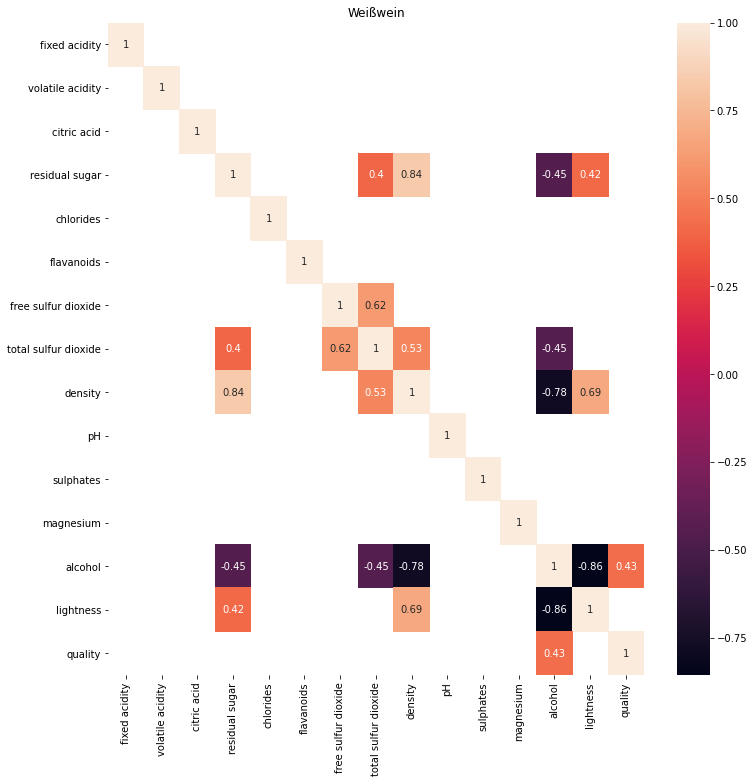

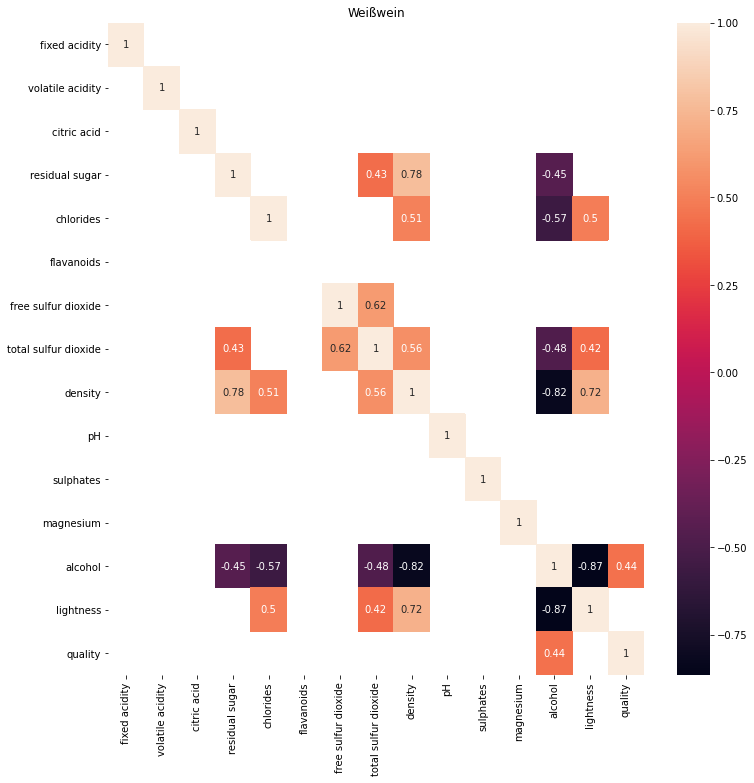

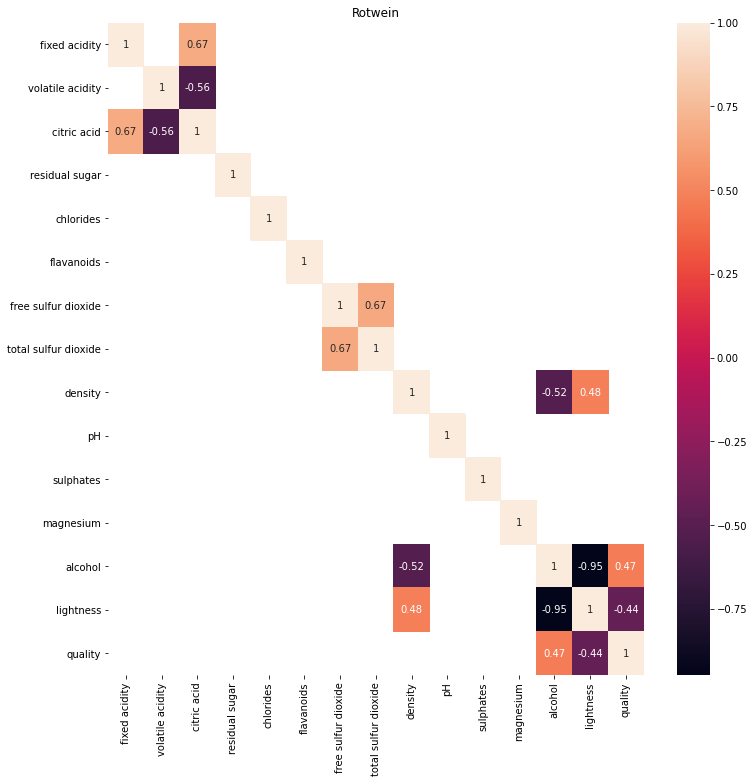

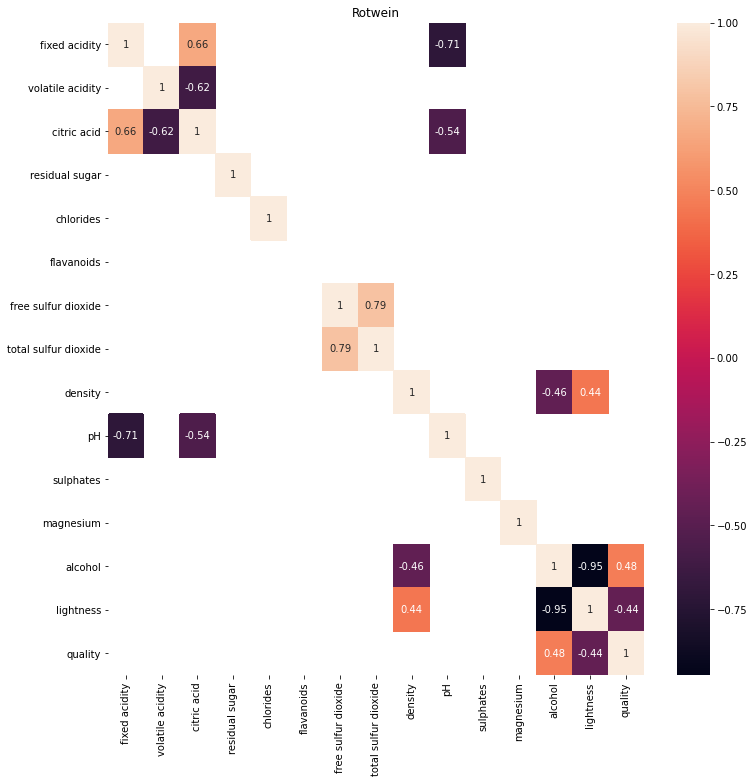

'\n    ### Pearson Korrelation ###\nschwache Korrelation:\n    Positiv:\n        ### Weißwein ###\n        - total sulfur dioxide & residual sugar (0.4)\n        - total sulfur dioxide & density (0.53)\n        - total sulfur dioxide & lightness (0.4)\n        - residual sugar & lightness (0.42)\n        ### Rotwein ###\n        - density & lightness (0.48)\n        - alcohol & quality (0.47)\n        \n    Negativ:\n        ### Weißwein ###\n        - residual sugar & alcohol (-0.45)\n        - total sulfur dioxide & alcohol (-0.45)\n        ### Rotwein ###\n        - volatile acidity & citric acid (-0.56)\n        - density & alcohol (-0.52)\n        - lightness & quality (-0.44)\n        \nmoderate Korrelation\n    Positiv:\n        ### Weißwein ###\n        - free sulfur dioxide & total sulfur dioxide (0.62)\n        - density & lightness (0.69)\n        ### Rotwein ###\n        - fixed acidity & citric acid (0.67)\n        - free sulfur dioxide & total sulfur dioxide (0.67)  \n   

In [11]:
cmap = sns.mpl_palette("Set2", 7)

for df in wine_list:
    # Plot nach Weinart betiteln
    if df["flavanoids"][0] == 0.53:
        title = "Rotwein"
    else:
        title = "Weißwein"
    
    #Pearson correlation -> lineare Korrelation
    corr_pearson = df.corr()
    #corr_pearson = corr_pearson.round(2)
    #Spearman correlation -> Rang Korrelation
    corr_spearman = df.corr(method="spearman")
    #Maske für relevante Korrelation
    bool_corr_p = (corr_pearson > -0.4) & (corr_pearson < 0.4)
    bool_corr_s = (corr_spearman > -0.4) & (corr_spearman < 0.4)

    
    fig, ax = plt.subplots(figsize = [12, 12])
    sns.heatmap(ax = ax, data=corr_pearson, annot = True, mask = bool_corr_p).set_title(title)
    plt.show()
    
    fig, ax = plt.subplots(figsize = [12, 12])
    sns.heatmap(ax = ax, data=corr_spearman, annot = True, mask = bool_corr_s).set_title(title)
    plt.show()

# df = df_list1[1]

# correlation = df.corr()
# correlation = correlation.round(2)

# boolCorr = (correlation > -0.4) & (correlation < 0.4)
# #print(boolCorr)


# fig, ax = plt.subplots(figsize = [12, 12])
# sns.heatmap(ax = ax, data=correlation, annot = True, mask = boolCorr)
# plt.show()

"""
    ### Pearson Korrelation ###
schwache Korrelation:
    Positiv:
        ### Weißwein ###
        - total sulfur dioxide & residual sugar (0.4)
        - total sulfur dioxide & density (0.53)
        - total sulfur dioxide & lightness (0.4)
        - residual sugar & lightness (0.42)
        ### Rotwein ###
        - density & lightness (0.48)
        - alcohol & quality (0.47)
        
    Negativ:
        ### Weißwein ###
        - residual sugar & alcohol (-0.45)
        - total sulfur dioxide & alcohol (-0.45)
        ### Rotwein ###
        - volatile acidity & citric acid (-0.56)
        - density & alcohol (-0.52)
        - lightness & quality (-0.44)
        
moderate Korrelation
    Positiv:
        ### Weißwein ###
        - free sulfur dioxide & total sulfur dioxide (0.62)
        - density & lightness (0.69)
        ### Rotwein ###
        - fixed acidity & citric acid (0.67)
        - free sulfur dioxide & total sulfur dioxide (0.67)  
    Negativ:
        ### Weißwein ###
        - density & alcohol (-0.78)
        ### Rotwein ###
starke Korrelation
    Positiv:
        ### Weißwein ###
        - residual sugar & density (0.84)
        ### Rotwein ###
    Negativ:
        ### Weißwein ###
        - alcohol & lightness (-0.86)
        ### Rotwein ###
        - alcohol & lightness (-0.95)
        
        
    ### Spearman Korrelation ###
    Positiv:
        ### Weißwein ###
        Schwach:
        - cholrides & density (0.51)
        - cholrides & alcohol (-0.57)
        - cholrides & lightness (0.5)
        
        ### Rotwein ###
        Moderat:
        - fixed acidity & pH (-0.71)
        - citric acid & pH (-0.57)



"""

In [ ]:
#Gesamte Visualisierung
#sns.pairplot(df_listC, hue="color")
#plt.show()

In [3]:
df_listC.describe()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,flavanoids,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,magnesium,alcohol,lightness,quality
count,6495.000000,6478.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6468.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,3248.755196,7.213453,0.339804,0.318670,5.443033,0.056123,0.416905,30.527329,115.747575,0.995130,3.252775,0.538531,0.492057,10.491844,0.105349,5.863279
std,1875.409590,1.295632,0.164960,0.145323,4.757924,0.035140,0.064610,17.751729,56.516565,0.003687,1.717880,0.270958,0.173181,1.192693,0.012140,2.188689
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,0.380000,1.000000,6.000000,0.987110,2.720000,0.000000,0.000000,8.000000,0.070000,3.000000
25%,1625.500000,6.400000,0.230000,0.250000,1.800000,0.038000,0.380000,17.000000,77.250000,0.992000,3.110000,0.330000,0.390000,9.500000,0.100000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,0.380000,29.000000,118.000000,0.994800,3.210000,0.570000,0.480000,10.300000,0.108000,6.000000
75%,4872.500000,7.700000,0.400000,0.390000,8.100000,0.066000,0.380000,41.000000,156.000000,0.998880,3.320000,0.740000,0.580000,11.300000,0.111000,6.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.610000,0.530000,289.000000,440.000000,1.038980,99.990000,2.000000,1.080000,14.900000,0.140000,99.000000


In [ ]:
df_temp= df_listC[df_listC['quality']!=99]
df_temp2 =df_temp[df_temp['quality']!=17]

df_temp3 =df_temp[df_temp['quality']==3]
print(df_temp)
sns.set_theme(style="whitegrid")
sns.histplot(df_listC['ID'], x=df_temp2['quality'], hue = df_listC['color'], linewidth=.5,edgecolor=".1",)
#sns.scatterplot(y=df_listC['free sulfur dioxide'], x=df_listC['chlorides'], hue = df_listC['color'])



In [ ]:
df_temp88= df_listC[df_listC['color']=='white']
df_temp77= df_listC[df_listC['color']=='red']

#df_red1.loc['quality'].mean()
print(df_temp88.iloc[:,15].mean(),df_temp77.iloc[:,15].mean())

#sns.histplot(df_listC['ID'], x=df_temp2['quality'].mean(), hue = df_listC['color'], linewidth=.5,edgecolor=".1",)
sns.scatterplot(y=df_listC['free sulfur dioxide'], x=df_listC['chlorides'], hue = df_listC['color'])

g = sns.jointplot(y=df_listC['lightness'], x=df_listC['alcohol'],
                  kind="reg", truncate=False,
                  color="m", height=7)
plt.show()
g = sns.jointplot(y=df_listCnoNAClean['alcohol'], x=df_listCnoNAClean['quality'],
                  kind="reg", truncate=False,
                  color="m", height=7)
plt.show()
sns.boxplot(x=df_listCnoNAClean['color'], y=df_listCnoNAClean['fixed acidity'],
             hue = df_listCnoNAClean['color'], palette=["m", "g"],
            data=df_listCnoNAClean)

In [ ]:
#!pip install plotly
#!pip install cufflinks
#!pip install chart_studio

import pandas as pd
import numpy as np

# dataviz imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import cufflinks as cf

# visualizing outliers
df_listC.select_dtypes('number').quantile(np.linspace(0, 1, 1001)).iplot(logy=True,
                                                                   layout_update={'hovermode': 'x',},
                                                                   xTitle='percentile',
                                                                   yTitle='value'
                                                                   )

# replacing outliers by NaNs
def drop_outliers(data: Union[pd.DataFrame, pd.Series],
                  min_quantile=0, max_quantile=1,
                  min_value=-np.inf, max_value=np.inf):
    """Sets the values that are out of the given range set by max/min quentiles or values to NaNs
    Returns pd.DataFrame or pd.Series
    """
    result = data[
        (data > data.quantile(min_quantile))
        & (data < data.quantile(max_quantile))
        & (data > min_value)
        & (data < max_value)
    ]
    return result

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    for num in [10, 50, 100, 1000]:
        # Generate some data
        x = np.random.normal(0, 0.5, num-3)

        # Add three outliers...
        x = np.r_[x, -3, -10, 12]
        plot(x)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

main()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
y = df_listCnoNAClean.iloc[:,15].to_numpy() #Only qualiy
X = df_listCnoNAClean.iloc[:,0:15].to_numpy() #all column except quality
#split data into 60% training data and 40% test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print("Training data: ",x_train.shape, y_train.shape)
print("Test data: ",x_test.shape, y_test.shape)

#Fit SVM classifier to training data
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
#Calculate accuracies
print("Training data accuracy: ",round(clf.score(x_train, y_train),3))
print("Test data accuracy: ",round(clf.score(x_test, y_test),3))

In [ ]:
#Computing cross-validated metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
y = df_listCnoNAClean.iloc[:1000,15].to_numpy() #Only qualiy
X = df_listCnoNAClean.iloc[:1000,0:15].to_numpy() #all columns except quality

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
#By default, the scores which are used equal the score which is used
#in the score function of the classifier, in 
#this case the SVM classifier uses accuracies
print("Single accuracies",scores)

#Mean score and the 95% confidence interval of the score estimate
#%0.3f means a float number with 3 digits
print("Mean accuracy: %0.3f (+/- %0.3f)" %(scores.mean(), scores.std() * 2))